In [70]:
# %pip install matplotlib
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
# Reading the dataset using raw string literals
df = pd.read_csv(r"C:\Users\asus\Jupyter Notebook\headbrain.csv")


In [32]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [16]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [17]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [18]:
df.shape

(237, 4)

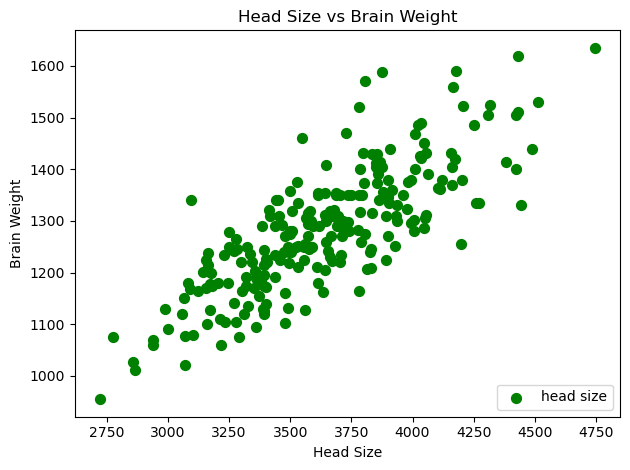

In [39]:
x2 = df.iloc[:,2:3].values
y2 = df.iloc[:,3:4].values
plt.scatter(x2,y2,label='head size',color='Green',s=50)
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title('Head Size vs Brain Weight')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [45]:
from scipy import stats
df = df[(df["Brain Weight(grams)"] < 1500) & (df["Brain Weight(grams)"] > 1000)]
df = df[(df["Head Size(cm^3)"] < 4600) & (df["Head Size(cm^3)"] > 2750)]
# Calculate the z-scores for each column
z_scores = stats.zscore(df)
print(f"Max scores :\n{z_scores.max()}")
print(f"Min scores :\n{z_scores.min()}")

threshold = 1.85 #1.85 - 0.74
# Remove rows with outliers based on the slope
df = df[(z_scores["Brain Weight(grams)"] < threshold) & (z_scores["Brain Weight(grams)"] > -threshold)]
df = df[(z_scores["Head Size(cm^3)"] < threshold) & (z_scores["Head Size(cm^3)"] > -threshold)]

Max scores :
Gender                 1.111805
Age Range              0.981537
Head Size(cm^3)        1.981368
Brain Weight(grams)    2.072810
dtype: float64
Min scores :
Gender                -0.899438
Age Range             -1.018810
Head Size(cm^3)       -1.965625
Brain Weight(grams)   -2.076819
dtype: float64


C:\Users\asus\AppData\Local\Temp\ipykernel_13200\172362306.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(z_scores["Head Size(cm^3)"] < threshold) & (z_scores["Head Size(cm^3)"] > -threshold)]


In [61]:
X = df.iloc[:, 2:3].values
#print(X)

In [62]:
y = df.iloc[:, 3:].values
# print(y)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [64]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

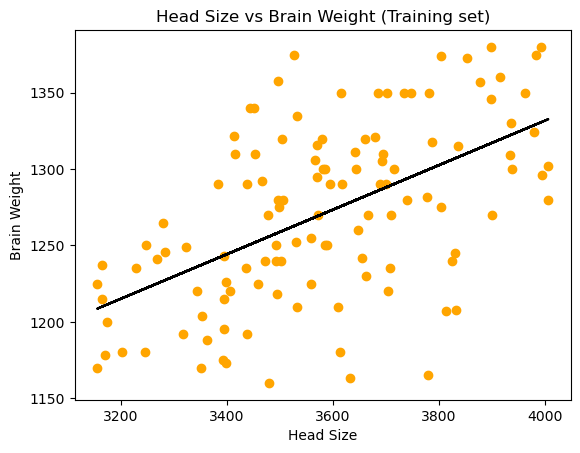

In [65]:
plt.scatter(X_train, y_train, color = 'Orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Head Size vs Brain Weight (Training set)')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

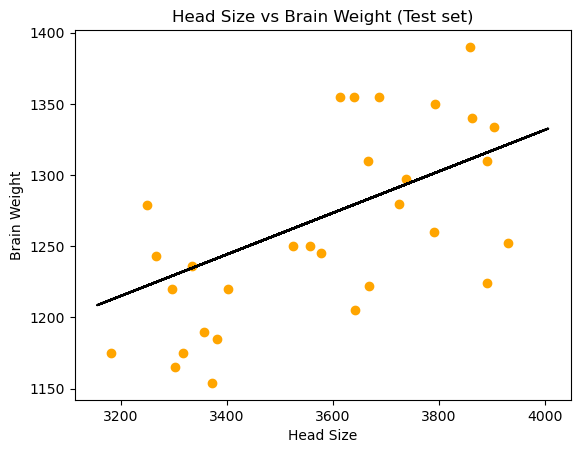

In [66]:
plt.scatter(X_test, y_test, color = 'Orange')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Head Size vs Brain Weight (Test set)')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [71]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Coefficients:  [[0.14589567]]
Mean squared error: 2627.25
Variance score: 0.38
